In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Lee el archivo de texto
with open('skyall.txt', 'r') as file:
    lines = file.readlines()

# Inicializa listas vacías para almacenar los datos
data = []
current_data = []
value = []
# Itera sobre las líneas del archivo
for line in lines:
    line = line.strip() #eliminar espacios en blanco (como espacios, tabulaciones y saltos de línea) 
    
    # Si la línea comienza con "Light", significa que es el comienzo de un nuevo conjunto de datos
    if line.startswith('Light'):
        value.append(line)
        if current_data:
            data.append(current_data)
        current_data = [line]
    else:
        current_data.append(line)

# Agrega el último conjunto de datos
if current_data:
    data.append(current_data)

# Convierte los datos en un DataFrame de pandas
df_list = []
for dataset in data:
    df = pd.DataFrame([x.split() for x in dataset[1:]], columns=['STDV'])
    df_list.append(df)

# Ahora df_list contiene una lista de DataFrames, uno por cada conjunto de datos



In [3]:
dv_med = np.zeros(len(df_list))

In [4]:
i = 0
for data in df_list:
    dv_med[i] = round(data['STDV'].median(), 1)
    i+=1

In [5]:
# Lee el archivo de texto
with open('fwhmall.txt', 'r') as file:
    lines = file.readlines()

# Inicializa listas vacías para almacenar los datos
data = []
current_data = []

# Itera sobre las líneas del archivo
for line in lines:
    line = line.strip() #eliminar espacios en blanco (como espacios, tabulaciones y saltos de línea) 
    
    # Si la línea comienza con "Light", significa que es el comienzo de un nuevo conjunto de datos
    if line.startswith('Light'):
        if current_data:
            data.append(current_data)
        current_data = [line]
    else:
        current_data.append(line)

# Agrega el último conjunto de datos
if current_data:
    data.append(current_data)

# Convierte los datos en un DataFrame de pandas
df_list = []
for dataset in data:
    df = pd.DataFrame([x.split() for x in dataset[1:]], columns=['Column', 'Line', 'Mag', 'FWHM', 'Ellip', 'PA'])
    df_list.append(df)

# Ahora df_list contiene una lista de DataFrames, uno por cada conjunto de datos


In [6]:
for i in range(len(df_list)):
    df_list[i][df_list[i].columns[1:]] = df_list[i][df_list[i].columns[1:]].astype(float)

In [7]:
fwhm_med = np.zeros(len(df_list))

In [8]:
i = 0
for f in df_list:
    fwhm_med[i] = round(f.FWHM.median(),1)
    i+=1

In [9]:
#Archivo que contiene, imagen y la mediana del fwhm y del sky
with open('IMFWSK.txt', 'w') as archivo:
    archivo.write('IMAGEN   FWHM   SKY' + '\n')
    for i in range(len(fwhm_med)):
        archivo.write(value[i] + '   ' + str(fwhm_med[i]) + '   '  + str(dv_med[i]) +'\n')
        i+=1
    archivo.close()

In [10]:
#Archivo que contiene imágenes de prueba para daofind
n = np.arange(0, len(fwhm_med), int(len(fwhm_med)/9))
with open('pThresDao.txt', 'w') as archivo:
    archivo.write('IMAGEN   FWHM   SKY' + '\n')
    for j in n:
        archivo.write(value[j] + '   ' + str(fwhm_med[j]) + '   '  + str(dv_med[j]) +'\n' )
    archivo.close()

In [11]:
coords = pd.read_csv('coords.lst', names=['name'])
coor =[]
for i in range(len(coords.name)):
    coor.append(coords.name[i])

In [12]:
ann = []
dann = []
aper = []
for i in range(len(fwhm_med)):
    ann.append(round(5*fwhm_med[i], 1))
    dann.append(round(2*fwhm_med[i],1))
    aper.append(round(1.2*fwhm_med[i],1))

In [13]:
#Archivo necesario para phot
with open('phot.txt', 'w') as archivo:
    archivo.write('IMAGEN  COORD  FWHM   SKY ANNULUS DANNULUS APERTURE' + '\n')
    for j in range(len(fwhm_med)):
        archivo.write(value[j] + '   ' + coor[j] +'   ' + str(fwhm_med[j]) + '   '  + str(dv_med[j]) + '   '  + str(ann[j]) + '   '  + str(dann[j]) + '   '  + str(aper[j]) + '\n' )
    archivo.close()

In [8]:
master = pd.read_csv('Master.dat', sep='\s+', header=55)

In [9]:
master

,IMAGE,XINIT,YINIT,ID,COORDS,LID,XCENTER,YCENTER,XSHIFT,YSHIFT,...,IFILTER,OTIME,RAPERT,SUM,AREA,FLUX,MAG,MERR,PIER,PERROR
0,Light_M6_30.0s_Bin1_V,392.498,3.397,4,Light_M6_30.0s_Bin1_V,4,392.498,3.397,0.0,0.0,...,V,23:47:55.130782,1.9,23506.18,11.64718,4353.148,19.596,0.081,0,NoError
1,Light_M6_30.0s_Bin1_V,1452.061,3.795,5,Light_M6_30.0s_Bin1_V,5,1452.061,3.795,0.0,0.0,...,V,23:47:55.130782,1.9,22027.95,11.56144,3054.423,19.980,0.107,0,NoError
2,Light_M6_30.0s_Bin1_V,1825.554,3.541,6,Light_M6_30.0s_Bin1_V,6,1825.554,3.541,0.0,0.0,...,V,23:47:55.130782,1.9,57644.42,11.65763,38420.990,17.231,0.013,0,NoError
3,Light_M6_30.0s_Bin1_V,5876.026,4.746,7,Light_M6_30.0s_Bin1_V,7,5876.026,4.746,0.0,0.0,...,V,23:47:55.130782,1.9,23290.18,11.54447,4344.988,19.598,0.079,0,NoError
4,Light_M6_30.0s_Bin1_V,479.420,4.578,8,Light_M6_30.0s_Bin1_V,8,479.420,4.578,0.0,0.0,...,V,23:47:55.130782,1.9,24489.87,11.64393,4907.824,19.466,0.070,0,NoError
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14257,Light_M6_30.0s_Bin1_V,4724.907,4173.266,14263,Light_M6_30.0s_Bin1_V,14263,4724.907,4173.266,0.0,0.0,...,V,23:47:55.130782,1.9,24506.95,11.57331,5603.833,19.322,0.061,0,NoError
14258,Light_M6_30.0s_Bin1_V,859.452,4173.952,14264,Light_M6_30.0s_Bin1_V,14264,859.452,4173.952,0.0,0.0,...,V,23:47:55.130782,1.9,23955.53,11.53638,4976.090,19.451,0.068,0,NoError
14259,Light_M6_30.0s_Bin1_V,2223.006,4173.949,14265,Light_M6_30.0s_Bin1_V,14265,2223.006,4173.949,0.0,0.0,...,V,23:47:55.130782,1.9,22845.66,11.80666,3598.737,19.802,0.089,0,NoError
14260,Light_M6_30.0s_Bin1_V,5081.260,4174.167,14266,Light_M6_30.0s_Bin1_V,14266,5081.260,4174.167,0.0,0.0,...,V,23:47:55.130782,1.9,24103.10,11.60895,5262.649,19.390,0.061,0,NoError


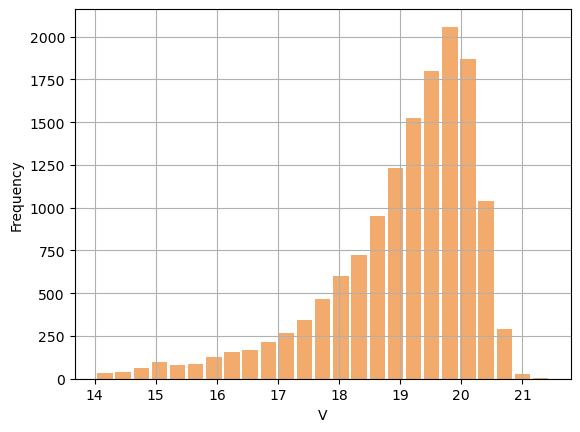

In [17]:
master.MAG.plot.hist(bins=25, color='#F2AB6D', rwidth=0.85, xlabel='V')
plt.grid()

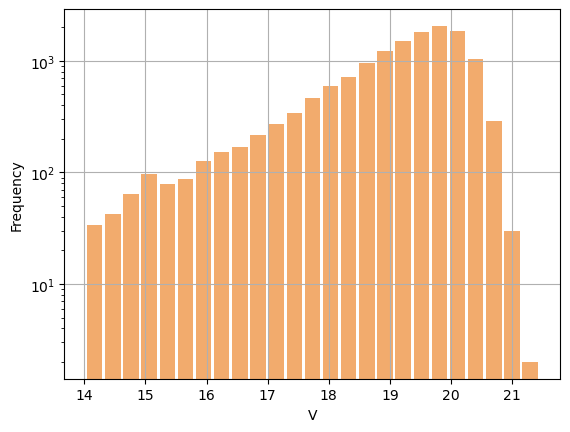

In [22]:
master.MAG.plot.hist(bins=25, color='#F2AB6D', rwidth=0.85, logy=True,xlabel='V')
plt.grid()